In [ ]:
# ===============================
# Online Payment Fraud Detection
# ===============================


In [ ]:
## Data Loading from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

path ='/content/drive/MyDrive/Colab Notebooks/onlinefraud.csv'
df = pd.read_csv(path, nrows=1000000)

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
## Initial Dataset Inspection

In [ ]:
df.shape
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1000000 non-null  int64  
 1   type            1000000 non-null  object 
 2   amount          1000000 non-null  float64
 3   nameOrig        1000000 non-null  object 
 4   oldbalanceOrg   1000000 non-null  float64
 5   newbalanceOrig  1000000 non-null  float64
 6   nameDest        1000000 non-null  object 
 7   oldbalanceDest  1000000 non-null  float64
 8   newbalanceDest  1000000 non-null  float64
 9   isFraud         1000000 non-null  int64  
 10  isFlaggedFraud  1000000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 83.9+ MB


,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
## Exploratory Data Analysis (EDA)
### Fraud vs Non-Fraud Distribution

isFraud
0    999465
1       535
Name: count, dtype: int64


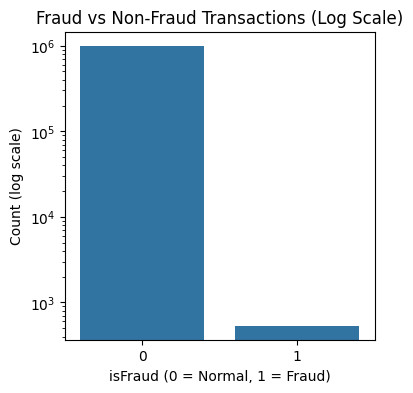

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# check exact counts
print(df['isFraud'].value_counts())

# better visualization
plt.figure(figsize=(4,4))
sns.countplot(x='isFraud', data=df)
plt.yscale('log')
plt.title('Fraud vs Non-Fraud Transactions (Log Scale)')
plt.xlabel('isFraud (0 = Normal, 1 = Fraud)')
plt.ylabel('Count (log scale)')
plt.show()

In [ ]:
## Data Preprocessing
### Removing Non-Predictive Identifier Columns

In [ ]:
df = df.drop(['nameOrig', 'nameDest'], axis=1)

In [ ]:
### Encoding Transaction Type using LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [ ]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']

In [ ]:
### Splitting Features and Target Variable

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
!pip install imbalanced-learn

In [ ]:
## Handling Class Imbalance using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [ ]:
## Random Forest Model Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train_res, y_train_res)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
## Model Evaluation Metrics
### Confusion Matrix and Classification Report
### Model Prediction

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[199786    107]
 [    24     83]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199893
           1       0.44      0.78      0.56       107

    accuracy                           1.00    200000
   macro avg       0.72      0.89      0.78    200000
weighted avg       1.00      1.00      1.00    200000



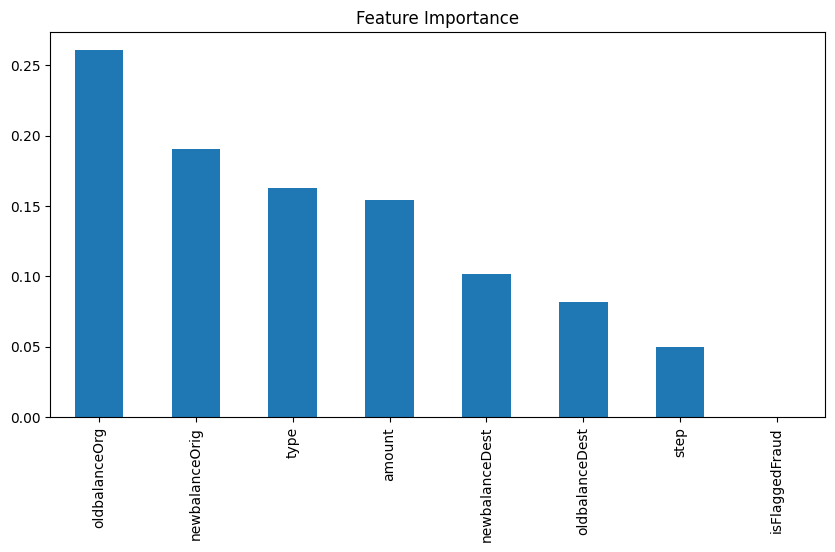

In [ ]:
import pandas as pd

importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title('Feature Importance')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[199786    107]
 [    24     83]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199893
           1       0.44      0.78      0.56       107

    accuracy                           1.00    200000
   macro avg       0.72      0.89      0.78    200000
weighted avg       1.00      1.00      1.00    200000



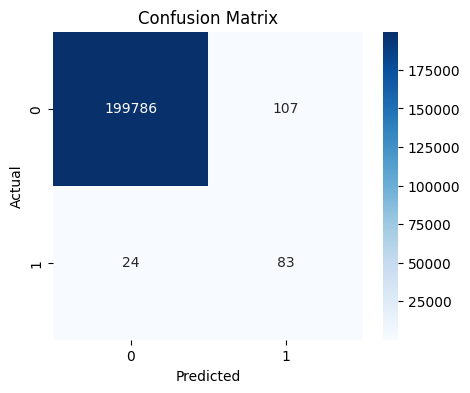

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()